**Benedictus Bayu Pramudhito**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [44]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [45]:
import os
print('\n'.join(os.listdir(r'./drive/My Drive')))

Getting started.pdf
Tugas Akhir
Banyuwangi-Bali 
CV Benedictus Bayu_(4) (1).pdf
CV Benedictus Bayu_(4).pdf
PT Transavia - Application Form (English) 2019.docx
PT Transavia - Application Form (English) 2019.gdoc
Video Telkom Marsya
Video Telkom Bene
Form Kandidat INDOCYBER (32).docx
Form Kandidat INDOCYBER (32).gdoc
Certificates
Colab Test (Bootcamp ML 2020)
Colab Notebooks
cats-dogs.zip
santa-dataset.zip
Cermati
titanic_train.csv
titanic_eval.csv
winequality-white.csv
ionosphere_data_kaggle.csv
ionosphere_data_kaggle (1).csv


In [46]:
train = pd.read_csv('./drive/My Drive/titanic_train.csv')
test = pd.read_csv('./drive/My Drive/titanic_eval.csv')
df = train.append(test, ignore_index=True)
df.head()

,survived,sex,age,n_siblings_spouses,parch,fare,class,deck,embark_town,alone
0,0,male,22.0,1,0,7.2500,Third,unknown,Southampton,n
1,1,female,38.0,1,0,71.2833,First,C,Cherbourg,n
2,1,female,26.0,0,0,7.9250,Third,unknown,Southampton,y
3,1,female,35.0,1,0,53.1000,First,C,Southampton,n
4,0,male,28.0,0,0,8.4583,Third,unknown,Queenstown,y


In [48]:
print(train.shape, test.shape, df.shape)

(627, 10) (264, 10) (891, 10)


In [49]:
df.replace('unknown', np.nan, inplace=True)

In [50]:
df.isnull().sum().sort_values()

survived                0
sex                     0
age                     0
n_siblings_spouses      0
parch                   0
fare                    0
class                   0
alone                   0
embark_town             2
deck                  688
dtype: int64

In [51]:
df.columns

Index(['survived', 'sex', 'age', 'n_siblings_spouses', 'parch', 'fare',
       'class', 'deck', 'embark_town', 'alone'],
      dtype='object')

In [52]:
df['deck'].value_counts(dropna=False)

NaN    688
C       59
B       47
D       33
E       32
A       15
F       13
G        4
Name: deck, dtype: int64

In [53]:
df = df.drop(labels=['deck'], axis=1)

In [54]:
df.describe(include=['O'])

,sex,class,embark_town,alone
count,891,891,889,891
unique,2,3,3,2
top,male,Third,Southampton,y
freq,577,491,644,537


In [55]:
df.embark_town.fillna('Southampton' , inplace=True)

In [56]:
df.head()

,survived,sex,age,n_siblings_spouses,parch,fare,class,embark_town,alone
0,0,male,22.0,1,0,7.2500,Third,Southampton,n
1,1,female,38.0,1,0,71.2833,First,Cherbourg,n
2,1,female,26.0,0,0,7.9250,Third,Southampton,y
3,1,female,35.0,1,0,53.1000,First,Southampton,n
4,0,male,28.0,0,0,8.4583,Third,Queenstown,y


In [58]:
embark_cat = pd.get_dummies(df['embark_town'])
alone_cat = pd.get_dummies(df['alone'])
parch_cat = pd.get_dummies(df['parch'])

In [59]:
df = pd.concat([df, embark_cat, alone_cat, parch_cat], axis=1)
df = df.drop(labels=['n_siblings_spouses','parch','age','fare','embark_town', 'alone'], axis=1)
df.head()

,survived,sex,class,Cherbourg,Queenstown,Southampton,n,y,0,1,2,3,4,5,6
0,0,male,Third,0,0,1,1,0,1,0,0,0,0,0,0
1,1,female,First,1,0,0,1,0,1,0,0,0,0,0,0
2,1,female,Third,0,0,1,0,1,1,0,0,0,0,0,0
3,1,female,First,0,0,1,1,0,1,0,0,0,0,0,0
4,0,male,Third,0,1,0,0,1,1,0,0,0,0,0,0


In [60]:
from sklearn.preprocessing import LabelEncoder

label_encode = LabelEncoder()
df['class'] = label_encode.fit_transform(df['class'])
#df['alone'] = label_encode.fit_transform(df['alone'])
df['sex'] = label_encode.fit_transform(df['sex'])

df.head()

,survived,sex,class,Cherbourg,Queenstown,Southampton,n,y,0,1,2,3,4,5,6
0,0,1,2,0,0,1,1,0,1,0,0,0,0,0,0
1,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0
2,1,0,2,0,0,1,0,1,1,0,0,0,0,0,0
3,1,0,0,0,0,1,1,0,1,0,0,0,0,0,0
4,0,1,2,0,1,0,0,1,1,0,0,0,0,0,0


In [61]:
df.dtypes

survived       int64
sex            int64
class          int64
Cherbourg      uint8
Queenstown     uint8
Southampton    uint8
n              uint8
y              uint8
0              uint8
1              uint8
2              uint8
3              uint8
4              uint8
5              uint8
6              uint8
dtype: object

In [62]:
print(train.shape, test.shape, df.shape)

(627, 10) (264, 10) (891, 15)


In [63]:
X_train = df[0:627].drop(['survived'], axis=1).values
y_train = df[0:627]['survived'].values
X_test  = df[627:].drop(['survived'], axis=1).values
y_test = df[627:]['survived'].values

In [64]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout

In [65]:
def plot_loss_new(history):
  history_df = pd.DataFrame(history.history)

  min_loss_index = history_df[history_df['loss']==min(history_df['loss'])].index.values
  min_loss = history_df.loc[min_loss_index]['loss']
  min_val_loss_index = history_df[history_df['val_loss']==min(history_df['val_loss'])].index.values
  min_val_loss = history_df.loc[min_val_loss_index]['val_loss']

  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.plot(min_loss_index, min_loss, 'o', c='k', ms=4, label='min loss')
  plt.plot(min_val_loss_index, min_val_loss, 'o', c='k', ms=4, label='min val_loss')
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.legend()
  plt.grid(True)
  plt.show()

  print('Minimum Loss             :', min_loss)
  print()
  print('Minimum Validation Loss  :', min_val_loss)

In [66]:
model = Sequential()

# layers
model.add(Dense(9, kernel_initializer = 'normal', activation = 'relu', input_dim = 14))
model.add(Dropout(0.25))
model.add(Dense(9, kernel_initializer = 'normal', activation = 'relu'))
#model.add(Dropout(0.25))
model.add(Dense(5, kernel_initializer = 'normal', activation = 'relu'))
#model.add(Dropout(0.25))
model.add(Dense(1, kernel_initializer = 'normal', activation = 'sigmoid'))

# summary
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_32 (Dense)             (None, 9)                 135       
_________________________________________________________________
dropout_13 (Dropout)         (None, 9)                 0         
_________________________________________________________________
dense_33 (Dense)             (None, 9)                 90        
_________________________________________________________________
dense_34 (Dense)             (None, 5)                 50        
_________________________________________________________________
dense_35 (Dense)             (None, 1)                 6         
Total params: 281
Trainable params: 281
Non-trainable params: 0
_________________________________________________________________


In [67]:
# Compiling the NN
model.compile(optimizer = 'rmsprop', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Train the NN
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size = 8, epochs = 100)

Epoch 1/100
79/79 [==============================] - 0s 3ms/step - loss: 0.6903 - accuracy: 0.6140 - val_loss: 0.6867 - val_accuracy: 0.6250
Epoch 2/100
79/79 [==============================] - 0s 1ms/step - loss: 0.6847 - accuracy: 0.6124 - val_loss: 0.6800 - val_accuracy: 0.6250
Epoch 3/100
79/79 [==============================] - 0s 2ms/step - loss: 0.6777 - accuracy: 0.6124 - val_loss: 0.6707 - val_accuracy: 0.6250
Epoch 4/100
79/79 [==============================] - 0s 1ms/step - loss: 0.6661 - accuracy: 0.6124 - val_loss: 0.6550 - val_accuracy: 0.6250
Epoch 5/100
79/79 [==============================] - 0s 2ms/step - loss: 0.6447 - accuracy: 0.6124 - val_loss: 0.6350 - val_accuracy: 0.6250
Epoch 6/100
79/79 [==============================] - 0s 1ms/step - loss: 0.6349 - accuracy: 0.6124 - val_loss: 0.6249 - val_accuracy: 0.6250
Epoch 7/100
79/79 [==============================] - 0s 1ms/step - loss: 0.6196 - accuracy: 0.6124 - val_loss: 0.6148 - val_accuracy: 0.6250
Epoch 8/100
7

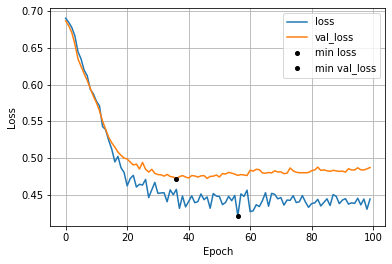

Minimum Loss             : 56    0.421124
Name: loss, dtype: float64

Minimum Validation Loss  : 36    0.471497
Name: val_loss, dtype: float64


In [68]:
plot_loss_new(history)

Sweet spot berada di epoch 36 dengan val_loss 0.471497 dan val_acc 0.7992